In [1]:
# !pip install sounddevice

In [125]:
import sounddevice as sd
from scipy.io.wavfile import write
from scipy.io.wavfile import read
from scipy.linalg import toeplitz, solve_toeplitz
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
fs = 16000  # Sample rate
seconds = 2  # Duration of recording

# Recording Audio Signal

In [272]:
# Uncomment code to record Audio

myrecording = sd.rec(int(seconds*fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
write('yes4.wav',fs, myrecording) # Save as WAV file 

# Listen to Audio

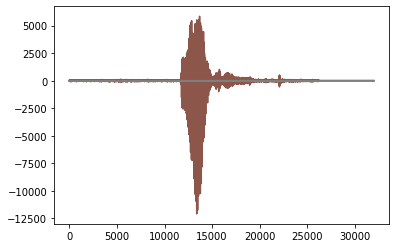

In [274]:

for i in range(1,5):
    fs, data = read('no{}.wav'.format(i))
    sd.play(data, fs)
    plt.plot(data)

for i in range(1,5):
    fs, data = read('yes{}.wav'.format(i))
    sd.play(data, fs)
    plt.plot(data)
# fs, data = read('no2.wav')
# sd.play(data, fs)
# plt.plot(data)
# fs, data = read('no3.wav')
# sd.play(data, fs)
# plt.plot(data)
# fs, data = read('yes4.wav')
# sd.play(data, fs)
# plt.plot(data)
# sd.play(myrecording, fs)

In [ ]:
!pip install pydub

In [28]:
# # Import packages
# from pydub import AudioSegment
# from pydub.playback import play

# # Play
# playaudio = AudioSegment.from_file('yes2.wav', format='wav')
# play(playaudio)

# Plot Audio Signal & Listen to Audio

In [246]:
#  Read the Audiofile
# fs, data = read('yes1.wav')
# sd.play(data, fs)
# # Frame rate for the Audio
# # print(fs)
# print(len(data))

32000


In [19]:
# Duration of the audio in Seconds
duration = len(data)/fs
print("Duration of Audio in Seconds", duration)
print("Duration of Audio in Minutes", duration/60)
time = np.arange(0,duration,1/fs)


Duration of Audio in Seconds 2.0
Duration of Audio in Minutes 0.03333333333333333


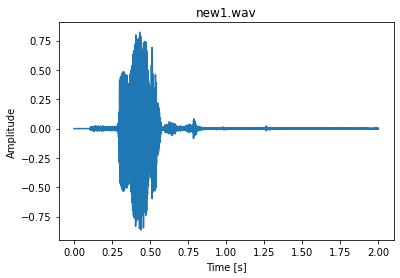

In [247]:

# Plotting the Graph using Matplotlib
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('new1.wav')
plt.show()

# 3. Creating frames (with windowing) from signal and then creating Toeplitz matrix

In [91]:
import os

if not os.path.isdir('splitaudio'):
    os.mkdir('splitaudio')
    
# fs, data = read('yes3.wav')
length_of_audio = len(data)

print('Length of Audio File: ', length_of_audio)
p = 12
start = 0
frame = 240
end = 0
counter = 0

sums = []
toeplitz_rnm = []

while end < length_of_audio:
    end = start + frame
    if end > length_of_audio:
        end = length_of_audio
#     print(start, end)
    chunk = data[start:end]
    # chunk is an n-D array containing 240 cols(frame size) 
#     print(chunk.tolist()) # convert each row in the form of comma separated list
#     print(chunk[0]) # this print first element of any chunk/window
    
    filename = f'splitaudio/chunk{counter}.wav'
    # Get Sum of 'Square of every element' of Window/Chunk
    sums.insert(counter, np.sum(np.square(chunk)))

    # Toeplitz Matrix
    rnm = []
    for i in range(0, p+1):
        summation = 0
        j = 0
        while end != 32000 and j+i < 240:
            summation = summation + chunk[j]*chunk[j+i]
            j+=1
        if end == 32000 and j+i < 160:
            summation = summation + chunk[j]*chunk[j+i]
            j+=1
        rnm.insert(i, summation)
#     print(len(rnm))
    counter += 1
    start = end - frame//3
    toeplitz_rnm.append(rnm)
    
# print('Toeplitz....',len(toeplitz_rnm))
print('\n************** Toeplitz Matrix of First Window **************\n')
print(toeplitz(np.array(toeplitz_rnm[0])[:-1]))


Length of Audio File:  32000

************** Toeplitz Matrix of First Window **************

[[ 4.37721610e-08  9.31322575e-10  2.79396772e-09  2.79396772e-09
   9.31322575e-10  4.65661287e-09  2.79396772e-09  4.65661287e-09
   2.79396772e-09 -1.86264515e-09 -1.86264515e-09 -9.31322575e-10]
 [ 9.31322575e-10  4.37721610e-08  9.31322575e-10  2.79396772e-09
   2.79396772e-09  9.31322575e-10  4.65661287e-09  2.79396772e-09
   4.65661287e-09  2.79396772e-09 -1.86264515e-09 -1.86264515e-09]
 [ 2.79396772e-09  9.31322575e-10  4.37721610e-08  9.31322575e-10
   2.79396772e-09  2.79396772e-09  9.31322575e-10  4.65661287e-09
   2.79396772e-09  4.65661287e-09  2.79396772e-09 -1.86264515e-09]
 [ 2.79396772e-09  2.79396772e-09  9.31322575e-10  4.37721610e-08
   9.31322575e-10  2.79396772e-09  2.79396772e-09  9.31322575e-10
   4.65661287e-09  2.79396772e-09  4.65661287e-09  2.79396772e-09]
 [ 9.31322575e-10  2.79396772e-09  2.79396772e-09  9.31322575e-10
   4.37721610e-08  9.31322575e-10  2.79396772

In [ ]:
def create_Window(data, frame_size, p):
    length_of_audio = len(data)

    print('Length of Audio File: ', length_of_audio)
    start = 0
    end = 0
    counter = 0
    sums = []
    toeplitz_rnm = []
    while end < length_of_audio:
        end = start + frame_size
        if end > length_of_audio:
            end = length_of_audio
#         print(start, end)
        chunk = data[start:end]
#     chunk is an n-D array containing 240 cols(frame size) 
#         print(chunk.tolist()) # convert each row in the form of comma separated list
#         print(chunk[0]) # this print first element of any chunk/window

        filename = f'splitaudio/chunk{counter}.wav'
        # Get Sum of 'Square of every element' of Window/Chunk
        sums.insert(counter, np.sum(np.square(chunk)))
        counter += 1
        start = end - frame//3
        toeplitz_rnm.append(Toeplitz_Matrix(end, chunk, p))
#     return 
        
def Toeplitz_Matrix(end, chunk, p):
    # Toeplitz Matrix
    rnm = []
    for i in range(0, p+1):
        summation = 0
        j = 0
        while end != 32000 and j+i < 240:
            summation = summation + chunk[j]*chunk[j+i]
            j+=1
        if end == 32000 and j+i < 160:
            summation = summation + chunk[j]*chunk[j+i]
            j+=1
        rnm.insert(i, summation)

    # print('Toeplitz....',len(toeplitz_rnm))
    print('\n************** Toeplitz Matrix of Current Window **************\n')
    toeplitz_matrix = toeplitz(np.array(rnm))
    print(toeplitz_matrix[:-1])
    return toeplitz_matrix

In [164]:
# this len(chunk) print  individual length of every chunk while doing in loop

# on printing this here, it is giving the length of last chunk which is 160 in size while rest of windows/chunks are of size 240
print(len(chunk))

160


Plot for **Sum of Squares** of every frame

Duration of Audio in Seconds 0.0125
Duration of Audio in Minutes 0.00020833333333333335
No. of Frames:  200


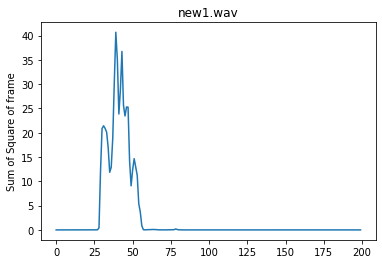

In [79]:
duration = len(sums)/fs
print("Duration of Audio in Seconds", duration)
print("Duration of Audio in Minutes", duration/60)
t = np.arange(0,duration,1/fs)

print('No. of Frames: ',len(sums))
# print('Sum of Squares:',sums)
# print('Frame {}- Sum of Square: {}'.format(0, sums[0]))

# Plotting the Graph using Matplotlib
plt.plot(sums)
# plt.xlabel('Time [s]')
plt.ylabel('Sum of Square of frame')
plt.title('new1.wav')
plt.show()

In [81]:
#  np.where(np.array(sums) > 0.1 , sums, 0)

# 4. Solving the Toeplitz matrix using Durbin's algorithm

In [208]:
def Find_predictive_coeeficients(i):
    toeplitz_matrix = toeplitz(np.array(i)[:12],np.array(i)[:12])
    vector = np.array(i)[1:]
#     vector_b = vector.transpose()
    print('T:',toeplitz_matrix[0])
    print('b:',vector_b)
    ai = solve_toeplitz((toeplitz_matrix[0],toeplitz_matrix[0]), vector)
#     print(round(ai[0],6))
    # Verification using Numpy system of linear scalar equations.
#     az = np.linalg.solve(toeplitz_matrix, vector)
#     print(az)
    return ai


# 5. Finding Cepstral coefficients from LPC coefficients and applying the "raised sine window"

c0 = log(sigma)**2

cm = am + (from k = 1 to m-1)[sum(k/m*ck*am-k)], where 1<= m<=p

cm = (from k = 1 to m-1)[sum(k/m*ck*am-k)], where m>p

In [216]:
def find_cepstral_coefficients(a_i):
    ceps_coeff = []
    c0 = np.var(a_i)
    ceps_coeff.insert(0, c0)
    for m in range(1, p+1):
        sum = a_i[m-1]
#         print('ai:',ai[m-1])
        for k in range(1, m):
            if k>=0 and m-k > 0 :
                sum += 1/m*ceps_coeff[k]*a_i[m-k-1]
        ceps_coeff.insert(m, sum)
#         print(ceps_coeff)
    return ceps_coeff


In [218]:
for i in toeplitz_rnm:
    a_i = Find_predictive_coeeficients(i)
    print('*********Predictive Coefficients:*********\n',a_i)
    Cepstral_coefficient = find_cepstral_coefficients(a_i)
    print('*********Cepstral Coefficients for Frame*********\n',Cepstral_coefficient)

T: [ 4.37721610e-08  9.31322575e-10  2.79396772e-09  2.79396772e-09
  9.31322575e-10  4.65661287e-09  2.79396772e-09  4.65661287e-09
  2.79396772e-09 -1.86264515e-09 -1.86264515e-09 -9.31322575e-10]
b: [ 1.93715096e-07  8.94069672e-08  7.45058060e-08  1.04308128e-07
 -2.08616257e-07 -1.78813934e-07 -3.12924385e-07 -2.98023224e-07
 -3.27825546e-07 -2.98023224e-07 -3.12924385e-07 -5.96046448e-08]
*********Predictive Coefficients:*********
 [-0.00296026  0.05514578  0.06386361  0.01534924  0.09230301  0.05596578
  0.09224561  0.04918783 -0.06717275 -0.07656345 -0.03738889  0.07484638]
*********Cepstral Coefficients for Frame*********
 [0.0032549448083937587, -0.0029602612518339535, 0.055150162191634315, 0.0637547726057586, 0.01601511725659782, 0.09369202072276396, 0.05684090013504273, 0.09394913156503468, 0.05141082661865181, -0.0649410868438248, -0.07373977831367451, -0.03620817238075603, 0.07531067202856401]
T: [ 5.58793545e-08 -4.65661287e-09  3.72529030e-09  0.00000000e+00
  0.0000000

*********Cepstral Coefficients for Frame*********
 [0.14117699487302865, 1.0412006425751643, 0.07891590620210165, 0.09689981022023317, -0.03479126998011986, 0.294901163633882, -0.23713778777052305, 0.2680243084937954, -0.021888755275573338, 0.05710529877648511, 0.0197873820791847, -0.04327456770787742, -0.03406722954585182]
T: [0.01144857 0.00927439 0.0064718  0.00526272 0.00513087 0.00526252
 0.0047018  0.00406556 0.0036296  0.00350749 0.00340771 0.00317235]
b: [ 1.93715096e-07  8.94069672e-08  7.45058060e-08  1.04308128e-07
 -2.08616257e-07 -1.78813934e-07 -3.12924385e-07 -2.98023224e-07
 -3.27825546e-07 -2.98023224e-07 -3.12924385e-07 -5.96046448e-08]
*********Predictive Coefficients:*********
 [ 1.11397127 -0.62833183  0.38170536 -0.21481522  0.36416523 -0.32514104
  0.2642855  -0.20337072  0.18871745 -0.13341685  0.1068276  -0.04592001]
*********Cepstral Coefficients for Frame*********
 [0.18176406370459494, 1.113971269871665, -0.007865833623989849, 0.14547005026286342, -0.0667650

 [0.18963710995758962, 1.1607213355646022, 0.17596930644271908, 0.26216416301239426, -0.37155515398596217, 0.2413986457978095, 0.03515209947660777, 0.05268948390514868, -0.03917202887228839, 0.068650723629901, 0.060246911345475704, -0.060769805011775924, -0.13072132571544284]
T: [8.19419511e-04 7.14242458e-04 5.95166348e-04 5.22851944e-04
 4.45168465e-04 3.91212292e-04 3.40088271e-04 3.05766240e-04
 2.55740248e-04 1.79650262e-04 1.10170804e-04 3.11452895e-05]
b: [ 1.93715096e-07  8.94069672e-08  7.45058060e-08  1.04308128e-07
 -2.08616257e-07 -1.78813934e-07 -3.12924385e-07 -2.98023224e-07
 -3.27825546e-07 -2.98023224e-07 -3.12924385e-07 -5.96046448e-08]
*********Predictive Coefficients:*********
 [ 1.04988175 -0.44547546  0.43249776 -0.37172804  0.35325863 -0.30523561
  0.33307435 -0.15320102  0.04696126 -0.03732742  0.03516445 -0.14062418]
*********Cepstral Coefficients for Frame*********
 [0.16249576658324072, 1.0498817463527788, 0.10565037599224147, 0.3135723699403616, -0.187672850

 [ 1.03027341 -0.34714645  0.29106398 -0.44182683  0.52778969 -0.39086083
  0.44416953 -0.24101034  0.22994574 -0.22050358  0.30101749 -0.31476232]
*********Cepstral Coefficients for Frame*********
 [0.1980822168339873, 1.0302734050054698, 0.18358519397197115, 0.2348930442659629, -0.32228968654924955, 0.36471845456989455, -0.22108330173337848, 0.32163023597715773, -0.09519759911787495, 0.1339569176942777, -0.12272221129394341, 0.21131562815849358, -0.2180234875092701]
T: [0.00066928 0.00059393 0.00050518 0.00043973 0.00038018 0.00035254
 0.00032858 0.00033056 0.00032744 0.0002897  0.0002195  0.00014791]
b: [ 1.93715096e-07  8.94069672e-08  7.45058060e-08  1.04308128e-07
 -2.08616257e-07 -1.78813934e-07 -3.12924385e-07 -2.98023224e-07
 -3.27825546e-07 -2.98023224e-07 -3.12924385e-07 -5.96046448e-08]
*********Predictive Coefficients:*********
 [ 1.07381324 -0.42527592  0.40780428 -0.43816422  0.49434434 -0.49833577
  0.48442261 -0.17707812  0.28011399 -0.38738121  0.21948209 -0.1761915 ]

# 6. Implementation of distance measures (only Tokhura distance)

In [ ]:
weight = [1, 3, 7, 13, 19, 22, 25, 33, 42, 52, 56, 61]
# for i in range(1, p+1):
    

# 7. Creation of codebook using KMeans and LBG/Binary Split algorithm

In [ ]:
import matplotlib.pyplot as plt

import random
import lbg

%matplotlib inline

# population size
SIZE_CODEBOOK = 2








# display population as blue crosses
plt.scatter([p[0] for p in population], [p[1] for p in population], marker='x', color='blue')

# generate codebook
%time cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(population, SIZE_CODEBOOK)


# display codebook as red filled circles
# codevectors with higher weight (more points near them) get bigger radius
plt.scatter([p[0] for p in cb], [p[1] for p in cb], s=[((w+1) ** 5) * 40 for w in cb_rel_w], marker='o', color='red')

plt.show()